# Training Final model with important features for Prediction

In [1]:
import numpy as np
import pandas as pd

In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kHYlbPezuWZWjErTPFNYSUjrR5C6ifu13Gnb21Jq8zly',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'placementtrendprediction-donotdelete-pr-fzwbc0sg0fxliy'
object_key = 'PlacementData.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [2]:
x = df.drop(columns=['sl_no','gender','ssc_b','hsc_b','hsc_s','degree_t','workex','etest_p','status','salary'])
x.head()

,ssc_p,hsc_p,degree_p,specialisation,mba_p
0,67.00,91.00,58.00,Mkt&HR,58.80
1,79.33,78.33,77.48,Mkt&Fin,66.28
2,65.00,68.00,64.00,Mkt&Fin,57.80
3,56.00,52.00,52.00,Mkt&HR,59.43
4,85.80,73.60,73.30,Mkt&Fin,55.50


In [3]:
Y = pd.DataFrame(df.status)
Y.head()

,status
0,Placed
1,Placed
2,Placed
3,Not Placed
4,Placed


**Label Encoding**

In [4]:
#Encoding Target Attribute
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
Y.status = Le.fit_transform(Y.status)
Y.head()
# #Placed-1 Not Placed-0

,status
0,1
1,1
2,1
3,0
4,1


In [5]:
#Encoding specialisation Attribute
x.specialisation = Le.fit_transform(x.specialisation)
x.head()
#Mkt&HR-1 Mkt&Fin-0

,ssc_p,hsc_p,degree_p,specialisation,mba_p
0,67.00,91.00,58.00,1,58.80
1,79.33,78.33,77.48,0,66.28
2,65.00,68.00,64.00,0,57.80
3,56.00,52.00,52.00,1,59.43
4,85.80,73.60,73.30,0,55.50


**Normalization**

In [6]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [7]:
x_scaled = pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,ssc_p,hsc_p,degree_p,specialisation,mba_p
0,0.538240,0.889621,0.195122,1.0,0.284483
1,0.792414,0.680890,0.670244,0.0,0.564843
2,0.497011,0.510708,0.341463,0.0,0.247001
3,0.311482,0.247117,0.048780,1.0,0.308096
4,0.925788,0.602965,0.568293,0.0,0.160795


**Splitting for Training and Testing Dataset**

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled,Y,test_size=0.2,random_state=5)

In [9]:
X_train.head()

,ssc_p,hsc_p,degree_p,specialisation,mba_p
214,0.435168,0.345964,0.073171,1.0,0.337706
39,0.826840,0.510708,0.341463,0.0,0.425412
84,0.600082,0.428336,0.487805,0.0,0.404423
40,0.764997,0.658979,0.731707,0.0,0.581334
107,0.847454,0.873147,0.804878,1.0,0.836207


In [10]:
X_train.shape

(172, 5)

In [11]:
X_test.shape

(43, 5)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
RFtree = RandomForestClassifier(criterion="gini", min_samples_split=2)
RFtree.fit(X_train,Y_train)

/tmp/wsuser/ipykernel_246/2149148105.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFtree.fit(X_train,Y_train)


RandomForestClassifier()

In [14]:
from sklearn.metrics import accuracy_score
Final_pred = RFtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(Y_test,Final_pred)*100 ,2), "%")

Accuracy Score : 93.02 %


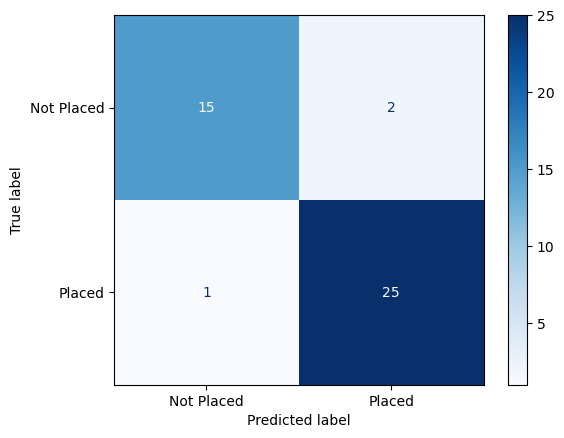

In [15]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test,Final_pred, cmap = plt.cm.Blues, normalize = None, display_labels = ['Not Placed', 'Placed'])

In [16]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Final_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.93      0.96      0.94        26

    accuracy                           0.93        43
   macro avg       0.93      0.92      0.93        43
weighted avg       0.93      0.93      0.93        43



# Deployment of model in IBM Cloud

In [17]:
!pip install -U ibm-watson-machine-learning

In [18]:
from ibm_watson_machine_learning import APIClient 

### Authentication and Set Space

In [19]:
wml_credentials = {
    "apikey":"YHDJcF33s3v8NO0E7-18A3aoCISM6BC7NB4C0qfFF2YQ",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [20]:
wml_client = APIClient(wml_credentials)

In [21]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------------  ------------------------
ID                                    NAME                  CREATED
8e9b5818-b979-4c51-9416-c7c637760e03  Placement-Prediction  2023-08-29T07:23:49.513Z
78b792c6-164b-4969-9ed2-c12adfea471b  Profit-Regression     2023-08-27T14:17:20.137Z
------------------------------------  --------------------  ------------------------


,ID,NAME,CREATED
0,8e9b5818-b979-4c51-9416-c7c637760e03,Placement-Prediction,2023-08-29T07:23:49.513Z
1,78b792c6-164b-4969-9ed2-c12adfea471b,Profit-Regression,2023-08-27T14:17:20.137Z


In [22]:
SPACE_ID = "8e9b5818-b979-4c51-9416-c7c637760e03"

In [23]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [24]:
wml_client.software_specifications.list(100)

-----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                           ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10        01ce9391-1a79-5a33-94fb-2e134337f314  base  supported
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10       079a91e0-245f-5269-8926-3c20b28f37dc  base  supported
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base  unsupported         pytorch-onnx_

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,supported,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,supported,
...,...,...,...,...,...
95,autoai-kb_3.0-py3.6,d139f196-e04b-5d8b-9140-9a10ca1fa91a,base,unsupported,autoai-kb_rt22.2-py3.10
96,spark-mllib_3.0-py36,d82546d5-dd78-5fbb-9131-2ec309bc56ed,base,unsupported,spark-mllib_3.3
97,autoai-kb_3.4-py3.8,da9b39c3-758c-5a4f-9cfd-457dd4d8c395,base,unsupported,autoai-kb_rt22.2-py3.10
98,kernel-spark3.2-r3.6,db2fe4d6-d641-5d05-9972-73c654c60e0a,base,not_provided,


### Saving and Deploying the Model

In [26]:
MODEL_NAME = "Placement"  #any name 
DEPLOYMENT_NAME = "Placement-Prediction" #same as space name
DEMO_MODEL = RFtree #name of the ML model

In [28]:
#set python version

software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')

In [29]:
import sklearn
sklearn.__version__

'1.1.1'

In [30]:
#setup model meta

model_props = {
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.1',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [31]:
#Save model

model_details = wml_client.repository.store_model(
    model = DEMO_MODEL,
    meta_props=model_props,
    training_data=X_train,
    training_target=Y_train)

In [32]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'status',
  'schemas': {'input': [{'fields': [{'name': 'ssc_p', 'type': 'float64'},
      {'name': 'hsc_p', 'type': 'float64'},
      {'name': 'degree_p', 'type': 'float64'},
      {'name': 'specialisation', 'type': 'float64'},
      {'name': 'mba_p', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': 'b56101f1-309d-549b-a849-eaa63f77b2fb',
   'name': 'runtime-22.2-py3.10'},
  'training_data_references': [{'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'ssc_p', 'type': 'float64'},
      {'name': 'hsc_p', 'type': 'float64'},
      {'name': 'degree_p', 'type': 'float64'},
      {'name': 'specialisation', 'type': 'float64'},
      {'name': 'mba_p', 'type': 'float64'}],
     'id': '1',
     'type': 'DataFrame'},
    'type': 'container'}],
  'type': 'scikit-learn_1.1'},
 'metadata': {'created_at': '2023-08-29T08:02:23.018Z',
  'id': 'bfc0aea6-1d2a-4cb

In [33]:
model_id = wml_client.repository.get_model_id(model_details)

In [34]:
model_id

'bfc0aea6-1d2a-4cbf-847c-57ddd2dbf3cd'

In [35]:
# Set meta

deployment_props = {
        wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
        wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [36]:
#Deploy

deployment = wml_client.deployments.create(
    artifact_uid = model_id,
    meta_props = deployment_props)



#######################################################################################

Synchronous deployment creation for uid: 'bfc0aea6-1d2a-4cbf-847c-57ddd2dbf3cd' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
.
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='b728d70c-2c60-4740-a34c-58164628f288'
------------------------------------------------------------------------------------------------


